# Report 3 
### Yada Pruksachatkun

In [5]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Beta
import thinkplot

## Chapter 5

Suppose you are having a dinner party with 10 guests and 4 of them are allergic to cats. Because you have cats, you expect 50% of the allergic guests to sneeze during dinner. At the same time, you expect 10% of the non-allergic guests to sneeze. What is the distribution of the total number of guests who sneeze?


In [3]:
from thinkbayes2 import MakeBinomialPmf
total_allergic = 4
total_nonallergic = 6
prob_sneeze_allergic = 0.5
prob_sneeze_nallergic = 0.1
allergic_pmf = MakeBinomialPmf(total_allergic, prob_sneeze_allergic)
nallergic_pmf = MakeBinomialPmf(total_nonallergic, prob_sneeze_nallergic)
total_pmf = allergic_pmf + nallergic_pmf
total_pmf.Print()

0 0.0332150625
1 0.155003625
2 0.2940148125
3 0.2912355
4 0.162415125
5 0.05252175
6 0.010265125
7 0.0012355
8 8.98125e-05
9 3.625e-06
10 6.25e-08


Exercise This study from 2015 showed that many subjects diagnosed with non-celiac gluten sensitivity (NCGS) were not able to distinguish gluten flour from non-gluten flour in a blind challenge.
Here is a description of the study:
"We studied 35 non-CD subjects (31 females) that were on a gluten-free diet (GFD), in a double-blind challenge study. Participants were randomised to receive either gluten-containing ﬂour or gluten-free ﬂour for 10 days, followed by a 2-week washout period and were then crossed over. The main outcome measure was their ability to identify which ﬂour contained gluten. "The gluten-containing ﬂour was correctly identiﬁed by 12 participants (34%)..." Since 12 out of 35 participants were able to identify the gluten flour, the authors conclude "Double-blind gluten challenge induces symptom recurrence in just one-third of patients fulﬁlling the clinical diagnostic criteria for non-coeliac gluten sensitivity."
Of the 35 subjects, 12 identified the gluten flour based on resumption of symptoms while they were eating it. Another 17 subjects wrongly identified the gluten-free flour based on their symptoms, and 6 subjects were unable to distinguish. 
Main assumptions: (1) people who are actually gluten sensitive have a 95% chance of correctly identifying gluten flour under the challenge conditions, and (2) subjects who are not gluten sensitive have only a 40% chance of identifying the gluten flour by chance (and a 60% chance of either choosing the other flour or failing to distinguish).
Using this model, estimate the number of study participants who are sensitive to gluten. What is the most likely number? What is the 95% credible interval?

In [4]:
class Gluten(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the probability of the data under the hypothesis.
        
        data: Number who identified, number who did not (in a tuple)
        hypothesis: number of participants who are gluten sensitive
        """
        gs = hypo
        yes, no = data
        n = yes + no
        ngs = n - gs
        
        pmf1 = MakeBinomialPmf(gs, 0.95)
        pmf2 = MakeBinomialPmf(ngs, 0.4)
        pmf = pmf1 + pmf2
        return pmf[yes]

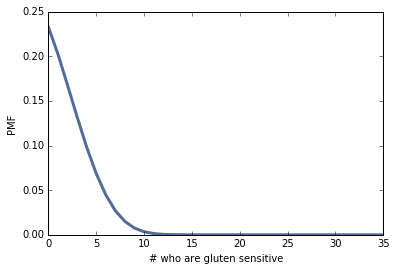

In [5]:
gluten_dist = Gluten(range(0, 35+1))
gluten_dist = gluten_dist.Copy()
data = 12, 23
gluten_dist.Update(data)
thinkplot.Pdf(gluten_dist)
thinkplot.Config(xlabel='# who are gluten sensitive', 
                 ylabel='PMF', legend=False)

## Chapter 9

**Exercise:** From [John D. Cook](http://www.johndcook.com/blog/2010/07/13/lincoln-index/)

"Suppose you have a tester who finds 20 bugs in your program. You want to estimate how many bugs are really in the program. You know there are at least 20 bugs, and if you have supreme confidence in your tester, you may suppose there are around 20 bugs. But maybe your tester isn't very good. Maybe there are hundreds of bugs. How can you have any idea how many bugs there are? There’s no way to know with one tester. But if you have two testers, you can get a good idea, even if you don’t know how skilled the testers are.

Suppose two testers independently search for bugs. Let k1 be the number of errors the first tester finds and k2 the number of errors the second tester finds. Let c be the number of errors both testers find.  The Lincoln Index estimates the total number of errors as k1 k2 / c [I changed his notation to be consistent with mine]."

So if the first tester finds 20 bugs, the second finds 15, and they find 3 in common, we estimate that there are about 100 bugs.  What is the Bayesian estimate of the number of errors based on this data?

In [ ]:
from scipy.special import binom as choose

def binomial(k, n, p):
    """Computes the rest of the binomial PMF.

    k: number of hits
    n: number of attempts
    p: probability of a hit
    """
    return p**k * (1-p)**(n-k)

class LincolnIndex(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the probability of the data under the hypothesis.
        
        data: Number of errors found by tester 1, 2, common and actual number of bugs. 
        hypothesis: Probability of accuracy of tester 1 and tester 2, and number of errors.
        """
        num_errors, prob_1, prob_2  = hypo
        acc_1, acc_2, common = data
        # the probability for tester 1 and 2 to find the number of bugs, given the probaiblity of 
        # tester 1 accurately identifying a bug and the total number of bugs. 
        tester_1 = choose(num_errors, acc_1) * binomial(acc_1, num_errors, prob_1)
        tester_2 = choose(num_errors, acc_2) * binomial(acc_2, num_errors, prob_2)
        # becuase the event of tester 1 finding acc_1 bugs has nothing to do with that 
        # of tester 2,to find the combined probability, simply multiply
        return tester_1 * tester_2

In [ ]:
# Solution
import numpy as np
data = 20, 15, 3
probs = np.linspace(0, 10, 31)
hypos = []
for n in range(32, 10):
    for p1 in probs:
        for p2 in probs:
            hypos.append((n, p1, p2))

suite = LincolnIndex(hypos)
suite.Update(data)

In [ ]:
# Marginal distribution, given the number of bugs and y label

n_marginal = suite.Marginal(0)
thinkplot.Pmf(n_marginal, label='n')
thinkplot.Config(xlabel='number of bugs',
                   ylabel='PMF')

print('post mean n', n_marginal.Mean())
print('MAP n', n_marginal.MAP())

 # Original Problem


1) We are given some of the parameters, but can't simulate the system without providing missing parameters.
2) We are given a sample of outcomes, and we're trying to infer the missing parameters.
3) We have to have a prior distribution for the parameters we're estimating.

 ##  Problem:  The Resident Evil Problem
 
Problem: In the video game world of Resident Evil, humanity was almost erased by the The T-Virus, which causes increased strength alongside dementia and cell-neurosis, turning humans into zombie-like states. While those effects hold true for most humans, some human's genetic makeup allows them to bond with the virus, letting them keep increased strength without the zombifying effects. 
Fifty years after the outbreak, almost everyone above ground has become insame with the virus. However, a small enclave below ground houses the last pockets of humans. There is a task force selected to go above-ground to scavange for food,the members of whom must have the antibody necessary to bond with the virus. The scientists in the facility have identified her husband as having a chance of having the antibody, but their supply of antibody diagnosis has run out. She knows her child and her both have the antibody.  Now, Ali must figure out the actual chances of her husband having the antibody. 
This is what Ali knows of her family history:

This is what Ali knows:

-Out of her extended family, her parents both had the antibody to the gene. 
-She has the antibody
-Her child has the antibody


The scientists also have a document of the collection of documents which detais the lineage of people with and without the antibodies. To the knowledge of the scientists, there is no way topartiifically pass the antibody on without terminating side effects. 

Using the attached file and what Ali knows, what is the probability her husband will have the antibody? 

 ### Solution

First, we must find the probability of the antibody being passed on to the lineage. In the r_virus.txt, each of the probabilities for the parents represent the number of parents who had the antibody (50% = 1 parent of two). We can phrase the question of probability of the antibody being passed on to the lineage as a conditional probaiblity. 

Y = The hypothesis that the person has the antibody

N = The hypothesis that the person does not have the antibody


In [2]:
from thinkbayes2 import Pmf, Cdf, Suite

class TVirus(Suite):

    def Likelihood(self, data, hypo):
        """Computes the likelihood of `data` given `hypo`.
        
        data: string 'Y' (child has the T-virus) or 'N' (child does not have the T-virus)
        hypo: probability of the antibody gene activation being passed
        down through generations
        
        returns: float
        """
        x = hypo
        if data == 'Y':
            return hypo
        else:
            return 1 - hypo


Before you can actually use the class, and run it through the data, notice that the data is not clean. Let's clean it! 

In [105]:
import csv

def read_data(filename='t_virus_report.csv'):
    """Read the reports from the file 
    """
    results = {}
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(open(filename, 'rU'))
        for row in reader:
            if ((row['T virus Antibody'] is not '') and (row['Parents'] is not '') and 
                row['Parents'] !='0%'):
                percentage = row['Parents']
                if (row['T virus Antibody'] == 'Y'):
                    if results.get(percentage) is None:
                        results[percentage]= {'Y': 1, 'N':0}
                    else:
                        results[percentage]['Y'] = results[percentage]['Y'] + 1 
                elif (row['T virus Antibody'] == 'N'):
                    if results.get(percentage) is None:
                        results[percentage]= {'N': 1}
                    else:
                        results[percentage]['N'] = results[percentage]['N'] + 1    
    return results

results = read_data()
print(results)


{'100%': {'Y': 6, 'N': 2}, '50%': {'Y': 6, 'N': 8}}


In [110]:

class Antibody(Suite):
    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self[hypo] = 1
        self.Normalize()
        self.yes_count = 0
        self.no_count = 0
        
    def Likelihood(self, data, hypo):
        if (data == 'Y'):
            self.yes_count = self.yes_count + 1
        else:
            self.no_count = self.no_count + 1
        if ((data == 'Y' and hypo == 0) or
            (data =='N' and hypo == 100)):
            return 0 
        elif (data =='Y' and hypo == 100):
            return 0
        if (data == 'Y'):
            return hypo/100
        else:
            return (1-hypo)/100
                    


{'Y': 6, 'N': 2}


89.56844357850015

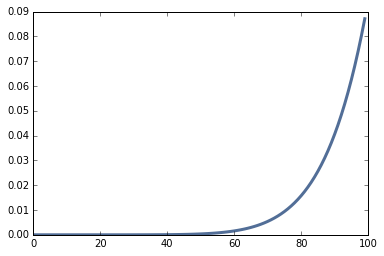

In [111]:
suite = Antibody(range(0, 100))
for res in results:
    if res == '100%':
        values = results[res]
        print(values)
        for key, value in values.items():
            for i in range((int(value))):
                suite.Update(key)
thinkplot.Pdf(suite)
suite.Mean()

Thus the probability the antibody will be passed down if both parents have the antibody is 89.605% Let us now try for if one parent has the antibody.

In [114]:
suite_two = Antibody(range(0, 100))
for res in results:
    if res == '50%':
        values = results[res]
        for key, value in values.items():
            for i in range((int(value))):
                suite_two.Update(key)

100%
50%
{'Y': 6, 'N': 8}


93.3052988006184

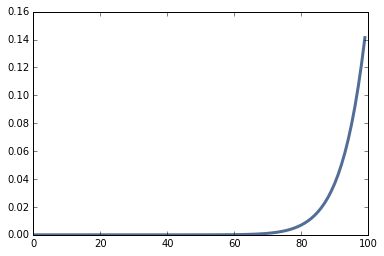

In [119]:
thinkplot.Pdf(suite_two)
suite_two.Mean()

Thus, the probability of a child having the antibody given one of the parents has the antibody is 0.93305. Now, she must figure out the probaiblity of her husband having the antibody. Although we can construct a class for this, because the hypothesis is binary, it is easier to compute by hand. 

In [123]:
prob_husband_no_antibody = 0.5*(0.93305)
prob_husband_yes_antibody = 0.5*(0.89605)
prob_husband_no_antibody = prob_husband_no_antibody/ (prob_husband_no_antibody + prob_husband_yes_antibody)
prob_husband_yes_antibody = prob_husband_yes_antibody/ (prob_husband_no_antibody + prob_husband_yes_antibody)
print(prob_husband_no_antibody)
print(prob_husband_yes_antibody)


0.510114263846
0.467599040041


Thus, there is a slightly higher chance that the husband does not have the antibody. 

4) Please include an update on where you are with respect to the project.  Is there a problem you have started that you could continue to work on?  Is there a domain or problem you are interested in but don't know how to solve?

My partner Andrea Jackson and I came up with two main ideas for the final project, which can be found here:
https://docs.google.com/document/d/1n-bS4zZ_S5f5sV-okZDyDADuaI_W4cXjK6obPJIQFig/edit?usp=sharing
We are using MCMC and Survival Analysis. Here is how we connected Survival Analysis to our first idea (Airbnb). 


In [125]:
from IPython.display import HTML
HTML('<iframe src=./Survival_Analysis_Notes.pdf width=700 height=350></iframe>')